<a href="https://colab.research.google.com/github/shashibyadav/Social-Media-Similarity-Index/blob/main/Project_Shashi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo echo -ne '\n' | sudo add-apt-repository ppa:alessandro-strada/ppa >/dev/null 2>&1 # note: >/dev/null 2>&1 is used to supress printing
!sudo apt update >/dev/null 2>&1
!sudo apt install google-drive-ocamlfuse >/dev/null 2>&1
!google-drive-ocamlfuse
!sudo apt-get install w3m >/dev/null 2>&1 # to act as web browser
!xdg-settings set default-web-browser w3m.desktop >/dev/null 2>&1 # to set default browser
%cd /content
!mkdir gdrive
%cd gdrive
!mkdir "My Drive"
!google-drive-ocamlfuse "/content/gdrive/My Drive"

/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force&state=qPpOBXVo6bk0cfDZhhDtasDh6n3bMI%2FQnvCNR5Yf6SU'
/bin/sh: 1: firefox: not found
/bin/sh: 1: google-chrome: not found
/bin/sh: 1: chromium-browser: not found
/usr/bin/open: 882: www-browser: not found
/usr/bin/open: 882: links2: not found
/usr/bin/open: 882: elinks: not found
/usr/bin/open: 882: links: not found
/usr/bin/open: 882: lynx: not found
/usr/bin/open: 882: w3m: not found
xdg-open: no method available for opening

Installing Required Packages

In [2]:
!pip install augly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31532 sha256=10a4daadc4bf771b03ec4b2927eb86afae84a85f544d09de337b478fd812423d
  Stored in directory: /root/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e476cfd48ed0df92b91080c1d
Successfully built iopath


Importing libraries

In [14]:
# from google.colab import drive
# drive.mount('/content/drive')
from glob import glob
import numpy as np
from tensorflow.keras.applications.convnext import ConvNeXtBase, preprocess_input as preprocess_inputCon, decode_predictions as decode_predictionsCon
from tensorflow.keras.preprocessing import image
import cv2
import pandas as pd
from tqdm.auto import tqdm
import os
import augly.image as imaugs
import augly.utils as utils
from IPython.display import display
import random
import io
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import norm
import keras, tensorflow as tf
from keras import layers
from keras.utils import load_img, img_to_array
import shutil,csv,os,imageio,PIL,glob
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras.backend as K
from numpy import dot
from keras.callbacks import EarlyStopping
import time

In [4]:
# base_path = "//content/drive/My Drive/"
base_path = "//content/gdrive/My Drive/"

Training Model

In [ ]:
def generate_image_vectors(folder_path):
    # Get a list of all files in the specified folder
    files = os.listdir(folder_path)
    with open(base_path + 'Image_Vectors/train_mapping.csv','w', encoding='utf-8') as out:
      csv_out=csv.writer(out)
      csv_out.writerow(['file_name','vectors'])
    # Print the list of files
      for file in files:
        image = load_img(base_path + "Dataset_resized")
        img_array = img_to_array(file)
        csv_out.writerow([file, img_array])

In [ ]:
image_dataset_path = base_path + "Dataset_resized"
generate_image_vectors(image_dataset_path)

In [4]:
def load_mapping (csv_file_path):
  mapping = []
  with open(csv_file_path, newline='') as csvfile:
      reader = csv.reader(csvfile)
      counter = 0
      for row in reader:
          if counter == 0:
            counter += 1
            continue
          mapping.append((row[0],row[1]))
  return mapping

In [15]:
csv_file_path = base_path + "Image_Vectors/train_mapping.csv"
image_mapping = load_mapping(csv_file_path)

In [ ]:
train_x_set = []
# train_y_set = []
train_directory = image_dataset_path
for item in image_mapping:
  file_name , cls = item
  directory = train_directory + "/" + file_name
  image = load_img(directory)
  img_array = img_to_array(image)
  train_x_set.append(img_array)
  # train_y_set.append(cls)

with open(base_path + "Image_Vectors/train_x_dataset_rgb",'wb') as out:
  np.save(out, train_x_set)

In [5]:
def load_local_train_dataset():
  train_x = []
  with open(base_path + "Image_Vectors/train_x_dataset_rgb",'rb') as out:
      train_x = np.load(out)
  return np.array(train_x)
train_x_set = load_local_train_dataset()

In [7]:
train_x_set = train_x_set[:10]

In [6]:
train_x_set.shape

(5000, 224, 224, 3)

In [7]:
modelCon = ConvNeXtBase(include_top=False, weights='imagenet', pooling='avg')

350926856/350926856 [==============================] - 14s 0us/step


In [8]:
generative_model = keras.Sequential();
generative_model.add(modelCon)
generative_model.add(layers.Reshape((1024, 1), input_shape=(1024,)))
generative_model.add(layers.Conv1D(filters=1, kernel_size=1))
generative_model.add(layers.Reshape((32, 32, 1)))

generative_model.add(layers.MaxPooling2D((2, 2), padding='same'))
generative_model.add(layers.Conv2DTranspose(8, (4, 4), padding='same', activation='relu'))
generative_model.add(layers.UpSampling2D((2,2)))
generative_model.add(layers.Conv2DTranspose(16,(4,4),padding='same',activation='relu'))
generative_model.add(layers.UpSampling2D((2,2)))
generative_model.add(layers.Conv2DTranspose(32,(4,4),padding='same',activation='relu'))
generative_model.add(layers.UpSampling2D((2,2)))
generative_model.add(layers.Conv2DTranspose(64,(4,4),padding='same',activation='relu'))
generative_model.add(layers.UpSampling2D((2,2)))
generative_model.add(layers.Conv2DTranspose(3,(4,4), padding='same'))
generative_model.add(layers.Resizing(224, 224, interpolation="bilinear", crop_to_aspect_ratio=False))



In [9]:
generative_model.layers[0].trainable = False

In [9]:
generative_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convnext_base (Functional)  (None, 1024)              87566464  
                                                                 
 reshape (Reshape)           (None, 1024, 1)           0         
                                                                 
 conv1d (Conv1D)             (None, 1024, 1)           2         
                                                                 
 reshape_1 (Reshape)         (None, 32, 32, 1)         0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 1)         0         
 D)                                                              
                                                                 
 conv2d_transpose (Conv2DTr  (None, 16, 16, 8)         136       
 anspose)                                               

In [ ]:
generative_model = keras.models.load_model(base_path+"Model/rgb_model")

In [10]:
generative_model.compile(loss='mse', optimizer='adam')

In [11]:
early_stop = EarlyStopping(monitor='val_loss',min_delta=0, patience=10, verbose=1,mode='auto')

In [15]:
def current_milli_time():
    return round(time.time() * 1000)

In [ ]:
history = []
numberOfEpochs = 500
tf.config.run_functions_eagerly(True)

startTime = current_milli_time()

for i in range(numberOfEpochs):
  start = i*10
  end = start + 10
  temp_history = generative_model.fit(train_x_set[start:end], train_x_set[start:end], epochs=100, callbacks=[early_stop], validation_split=0.1)
  history.append(temp_history)
  print("First " + str(i * 10 + 10) + "Images done")

endTime = current_milli_time()


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 [==============================] - 1s 1s/step - loss: 5763.6831 - val_loss: 8664.5098
Epoch 2/100
1/1 [==============================] - 2s 2s/step - loss: 5703.1226 - val_loss: 8242.8115
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 5641.7690 - val_loss: 7860.3784
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 5648.6035 - val_loss: 7642.0879
Epoch 5/100
1/1 [==============================] - 1s 1s/step - loss: 5692.0884 - val_loss: 7608.0903
Epoch 6/100
1/1 [==============================] - 1s 1s/step - loss: 5680.9697 - val_loss: 7735.8931
Epoch 7/100
1/1 [==============================] - 1s 1s/step - loss: 5606.3237 - val_loss: 7992.0903
Epoch 8/100
1/1 [==============================] - 1s 990ms/step - loss: 5542.1538 - val_loss: 8282.1699
Epoch 9/100
1/1 [==============================] - 1s 1s/step - loss: 5529.2212 - val_loss: 8473.6572
Epoch 10/100
1/1 [==============================] - 1s 997ms/step - loss: 5536.9092 - val_l

In [18]:
generative_model.save(base_path+"Model/rgb_model")

In [20]:
from numba import cuda
device = cuda.get_current_device()
device.reset()

Utility functions

In [6]:
def return_image_embeddingConv(model, img_path):
  img = image.load_img(img_path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_inputCon(x)
  preds = model.predict(x)
  curr_df = pd.DataFrame(preds[0]).T

  return curr_df.to_numpy()

def alter_image(input_img_path, c):
  x = random.uniform(0, 0.3)
  y = random.uniform(0.6, 1)

  input_img = imaugs.crop(input_img_path,
                          x1=x,
                          x2=y,
                          y1=x,
                          y2=y
                          )

  input_img = imaugs.meme_format(
        input_img,
        caption_height=100,
        meme_bg_color=(0, 0, 0),
        text_color=(255, 255, 255),
    )

  for i in range(2):
    n = random.randint(1, 7)
    print(n)
    # We can use the AugLy scale augmentation
    if n == 1:
      input_img= imaugs.skew(input_img)

    if n ==2:
      input_img = imaugs.blur(input_img, radius=5.0)

    if n==3:
      input_img = imaugs.brightness(input_img,factor=1.5)

    if n==4:
      #make it darker
      input_img = imaugs.brightness(input_img,factor=0.5)

    if n==5:
      input_img = imaugs.contrast(input_img,factor=1.7)

    if n==6:
      #horizontal flip
      input_img = imaugs.hflip(input_img)

    if n==7:
      #vertical flip
      input_img= imaugs.vflip(input_img)
      #display(input_img)
    # display(input_img)

  loc = base_path + 'Generated2/G' + str(c) + '.jpg'
  input_img.save(loc)

Testing model embeddings

In [ ]:
def get_vector(img_array):
  get_all_layer_outputs = K.function([generative_model.layers[0].input],
                                  [l.output for l in generative_model.layers[1:]])
  layer_output = get_all_layer_outputs([img_array])
  return layer_output[0].flatten()

In [10]:
modelCon = ConvNeXtBase(include_top=False, weights='imagenet', pooling='avg')
img_pathCon = base_path + 'Query_dataset/Q00000.jpg'
test_embeddingCon = return_image_embeddingConv(modelCon, img_pathCon)
print(test_embeddingCon.shape)

1/1 [==============================] - 16s 16s/step
(1, 1024)


In [18]:
modelCon = None

Read reference images

In [ ]:
source_dir1=base_path + 'Dataset_0'
file_list1 = glob(source_dir1 + '/*.jpg')
# file_list1 = file_list1[:1000]

//content/drive/My Drive/Dataset_0/R004272.jpg
7


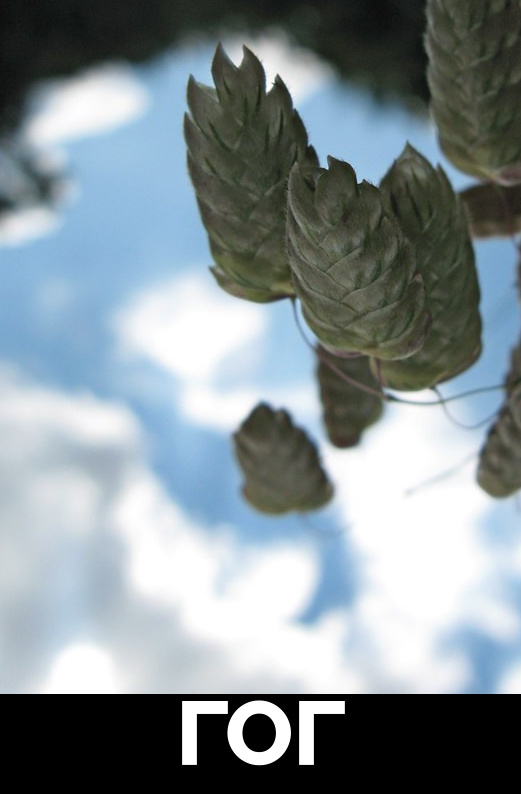

3


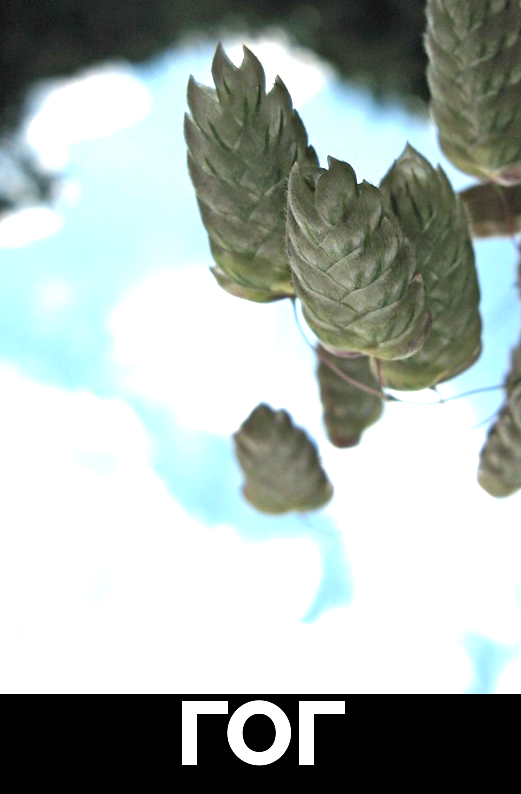

In [ ]:
test_file = file_list1[12]
print(test_file)
alter_image(test_file, 11)

Generating Images

In [ ]:
c=0
for image in file_list1:
 alter_image(image, c)
 c+=1

Streaming output truncated to the last 5000 lines.
7
6
1
5
7
7
6
3
3
1
1
5
5
2
6
7
5
4
6
7
6
2
2
6
7
2
6
3
2
5
6
1
5
7
3
3
5
6
1
2
7
2
5
4
1
2
3
5
1
3
4
7
1
7
4
6
6
5
3
5
5
6
3
1
4
2
7
7
1
3
7
2
5
3
3
1
3
2
1
1
3
3
2
3
7
7
3
5
1
6
7
1
5
3
2
4
4
1
3
5
5
5
5
3
5
4
7
4
2
6
3
4
6
1
1
1
7
4
3
6
4
7
7
7
5
3
7
7
3
5
4
5
7
3
6
6
4
7
2
2
3
2
3
2
3
3
4
6
1
3
2
3
3
5
3
3
3
1
5
1
7
7
1
5
5
1
7
5
7
7
6
4
4
5
1
6
3
4
2
7
2
2
5
2
4
1
7
3
4
7
7
5
4
4
6
4
4
6
2
7
6
7
2
4
1
1
3
1
7
5
5
4
2
1
5
4
6
5
3
7
4
4
3
5
6
6
2
6
5
5
3
3
2
6
7
3
6
6
6
2
5
3
5
3
7
1
2
7
5
1
3
1
4
7
3
1
6
6
3
5
6
5
2
4
2
4
7
7
7
4
4
5
6
4
1
2
7
1
6
4
3
2
6
6
4
3
6
3
2
6
5
5
6
3
2
1
5
6
4
6
3
7
5
5
1
7
6
6
3
2
1
4
2
6
4
2
1
6
1
3
3
3
7
3
5
6
4
3
2
3
5
4
2
3
7
5
7
6
4
3
7
2
3
5
4
5
3
1
6
4
1
1
1
4
3
5
1
5
2
5
1
3
4
6
5
2
4
6
3
3
4
6
3
1
6
3
6
6
2
4
7
1
2
6
1
6
4
1
7
5
7
4
7
2
2
3
6
2
3
7
2
6
2
1
7
7
1
7
2
6
7
6
7
2
7
3
2
3
6
2
6
3
6
4
4
4
3
6
3
4
7
1
1
1
1
1
4
6
6
2
4
6
2
2
3
7
5
3
2
1
3
5
2
2
4
6
1
6
6
5
3
2
7
7
2
6
7
3
6
2
1
4
6
1
2

Generating Embeddings

In [ ]:
source_dir1=base_path + 'Dataset_0'
file_list1 = glob(source_dir1 + '/*.jpg')
# file_list1 = file_list1[:1000]

In [ ]:
final_data = pd.DataFrame()

final_data['reference_img_path'] = file_list1
final_data['reference_id'] = None
final_data['generated_id'] = None
final_data['reference_img_embedding'] = None
final_data['generated_img_path'] = None
final_data['generated_img_embedding'] = None

for i in range(len(file_list1)):
  crop_name = final_data['reference_img_path'][i][-11:][:-4]
  final_data['reference_id'][i] = crop_name

final_data

,reference_img_path,reference_id,generated_id,reference_img_embedding,generated_img_path,generated_img_embedding
0,//content/drive/My Drive/Dataset_0/R004268.jpg,R004268,None,None,None,None
1,//content/drive/My Drive/Dataset_0/R004208.jpg,R004208,None,None,None,None
2,//content/drive/My Drive/Dataset_0/R004304.jpg,R004304,None,None,None,None
3,//content/drive/My Drive/Dataset_0/R004228.jpg,R004228,None,None,None,None
4,//content/drive/My Drive/Dataset_0/R004054.jpg,R004054,None,None,None,None
...,...,...,...,...,...,...
4995,//content/drive/My Drive/Dataset_0/R001039.jpg,R001039,None,None,None,None
4996,//content/drive/My Drive/Dataset_0/R001056.jpg,R001056,None,None,None,None
4997,//content/drive/My Drive/Dataset_0/R000757.jpg,R000757,None,None,None,None
4998,//content/drive/My Drive/Dataset_0/R000926.jpg,R000926,None,None,None,None


In [ ]:
for i in range(len(final_data)):
  final_data['generated_id'][i] = "G_"+str(final_data['reference_id'][i])

  final_data['generated_img_path'][i] = base_path + 'Generated4/G' + str(i) + '.jpg'

  final_data['reference_img_embedding'][i] = return_image_embeddingConv(modelCon, final_data['reference_img_path'][i])
  final_data['generated_img_embedding'][i] = return_image_embeddingConv(modelCon, final_data['generated_img_path'][i])


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 163ms/step


In [ ]:
final_data[~final_data['reference_img_embedding'].isna()].reset_index()

,index,reference_img_path,reference_id,generated_id,reference_img_embedding,generated_img_path,generated_img_embedding
0,0,//content/drive/My Drive/Dataset_0/R004268.jpg,R004268,G_R004268,"[[-0.9641676, 0.4335617, -0.23603532, 1.679158...",//content/drive/My Drive/Generated4/G0.jpg,"[[-1.4280246, 0.09468599, -0.84211653, 1.39034..."
1,1,//content/drive/My Drive/Dataset_0/R004208.jpg,R004208,G_R004208,"[[-0.21354671, 0.070478655, -0.944566, -1.3221...",//content/drive/My Drive/Generated4/G1.jpg,"[[-0.94812834, 0.6796491, -0.05164271, -1.0839..."
2,2,//content/drive/My Drive/Dataset_0/R004304.jpg,R004304,G_R004304,"[[0.45541537, 0.84733856, -0.13551146, -0.1239...",//content/drive/My Drive/Generated4/G2.jpg,"[[0.1890535, 1.0737404, -0.03142845, -0.236209..."
3,3,//content/drive/My Drive/Dataset_0/R004228.jpg,R004228,G_R004228,"[[0.09373533, -0.13513735, -0.5911528, -0.5898...",//content/drive/My Drive/Generated4/G3.jpg,"[[-0.29005787, 1.27806, 0.24844661, -0.9123021..."
4,4,//content/drive/My Drive/Dataset_0/R004054.jpg,R004054,G_R004054,"[[-0.87101966, 0.8276178, -1.157166, 0.5095588...",//content/drive/My Drive/Generated4/G4.jpg,"[[-0.37957898, 0.88656044, 0.03765791, 1.66881..."
...,...,...,...,...,...,...,...
4995,4995,//content/drive/My Drive/Dataset_0/R001039.jpg,R001039,G_R001039,"[[-0.6775842, -1.0309311, 0.49830934, 0.322154...",//content/drive/My Drive/Generated4/G4995.jpg,"[[-0.025454085, 0.52386343, 0.22400977, -1.065..."
4996,4996,//content/drive/My Drive/Dataset_0/R001056.jpg,R001056,G_R001056,"[[0.1506577, 0.30475652, -1.7062066, 1.0153134...",//content/drive/My Drive/Generated4/G4996.jpg,"[[-1.3024809, 1.4767798, 1.5465984, -0.2086081..."
4997,4997,//content/drive/My Drive/Dataset_0/R000757.jpg,R000757,G_R000757,"[[-0.43653226, -0.1075077, -1.2294165, 1.93686...",//content/drive/My Drive/Generated4/G4997.jpg,"[[-0.74048257, -1.0250095, 1.9506648, 0.735343..."
4998,4998,//content/drive/My Drive/Dataset_0/R000926.jpg,R000926,G_R000926,"[[-0.8732697, -0.46107072, -0.8685075, -0.3411...",//content/drive/My Drive/Generated4/G4998.jpg,"[[-0.061267927, 0.99835914, 1.3869023, 0.30007..."


In [ ]:
final_data['reference_img_embedding'][0][0]
final_data

,reference_img_path,reference_id,generated_id,reference_img_embedding,generated_img_path,generated_img_embedding
0,//content/drive/My Drive/Dataset_0/R004268.jpg,R004268,G_R004268,"[[-0.9641676, 0.4335617, -0.23603532, 1.679158...",//content/drive/My Drive/Generated4/G0.jpg,"[[-1.4280246, 0.09468599, -0.84211653, 1.39034..."
1,//content/drive/My Drive/Dataset_0/R004208.jpg,R004208,G_R004208,"[[-0.21354671, 0.070478655, -0.944566, -1.3221...",//content/drive/My Drive/Generated4/G1.jpg,"[[-0.94812834, 0.6796491, -0.05164271, -1.0839..."
2,//content/drive/My Drive/Dataset_0/R004304.jpg,R004304,G_R004304,"[[0.45541537, 0.84733856, -0.13551146, -0.1239...",//content/drive/My Drive/Generated4/G2.jpg,"[[0.1890535, 1.0737404, -0.03142845, -0.236209..."
3,//content/drive/My Drive/Dataset_0/R004228.jpg,R004228,G_R004228,"[[0.09373533, -0.13513735, -0.5911528, -0.5898...",//content/drive/My Drive/Generated4/G3.jpg,"[[-0.29005787, 1.27806, 0.24844661, -0.9123021..."
4,//content/drive/My Drive/Dataset_0/R004054.jpg,R004054,G_R004054,"[[-0.87101966, 0.8276178, -1.157166, 0.5095588...",//content/drive/My Drive/Generated4/G4.jpg,"[[-0.37957898, 0.88656044, 0.03765791, 1.66881..."
...,...,...,...,...,...,...
4995,//content/drive/My Drive/Dataset_0/R001039.jpg,R001039,G_R001039,"[[-0.6775842, -1.0309311, 0.49830934, 0.322154...",//content/drive/My Drive/Generated4/G4995.jpg,"[[-0.025454085, 0.52386343, 0.22400977, -1.065..."
4996,//content/drive/My Drive/Dataset_0/R001056.jpg,R001056,G_R001056,"[[0.1506577, 0.30475652, -1.7062066, 1.0153134...",//content/drive/My Drive/Generated4/G4996.jpg,"[[-1.3024809, 1.4767798, 1.5465984, -0.2086081..."
4997,//content/drive/My Drive/Dataset_0/R000757.jpg,R000757,G_R000757,"[[-0.43653226, -0.1075077, -1.2294165, 1.93686...",//content/drive/My Drive/Generated4/G4997.jpg,"[[-0.74048257, -1.0250095, 1.9506648, 0.735343..."
4998,//content/drive/My Drive/Dataset_0/R000926.jpg,R000926,G_R000926,"[[-0.8732697, -0.46107072, -0.8685075, -0.3411...",//content/drive/My Drive/Generated4/G4998.jpg,"[[-0.061267927, 0.99835914, 1.3869023, 0.30007..."


In [ ]:
final_data.to_csv(base_path + "Convnext_Dataframe/df_with_truenegatives.csv")

In [ ]:
final_data.head(1000)

,reference_img_path,reference_id,generated_id,reference_img_embedding,generated_img_path,generated_img_embedding
0,//content/drive/My Drive/Dataset_0/R004268.jpg,R004268,G_R004268,"[[-0.9641676, 0.4335617, -0.23603532, 1.679158...",//content/drive/My Drive/Generated4/G0.jpg,"[[-1.4280246, 0.09468599, -0.84211653, 1.39034..."
1,//content/drive/My Drive/Dataset_0/R004208.jpg,R004208,G_R004208,"[[-0.21354671, 0.070478655, -0.944566, -1.3221...",//content/drive/My Drive/Generated4/G1.jpg,"[[-0.94812834, 0.6796491, -0.05164271, -1.0839..."
2,//content/drive/My Drive/Dataset_0/R004304.jpg,R004304,G_R004304,"[[0.45541537, 0.84733856, -0.13551146, -0.1239...",//content/drive/My Drive/Generated4/G2.jpg,"[[0.1890535, 1.0737404, -0.03142845, -0.236209..."
3,//content/drive/My Drive/Dataset_0/R004228.jpg,R004228,G_R004228,"[[0.09373533, -0.13513735, -0.5911528, -0.5898...",//content/drive/My Drive/Generated4/G3.jpg,"[[-0.29005787, 1.27806, 0.24844661, -0.9123021..."
4,//content/drive/My Drive/Dataset_0/R004054.jpg,R004054,G_R004054,"[[-0.87101966, 0.8276178, -1.157166, 0.5095588...",//content/drive/My Drive/Generated4/G4.jpg,"[[-0.37957898, 0.88656044, 0.03765791, 1.66881..."
...,...,...,...,...,...,...
995,//content/drive/My Drive/Dataset_0/R004918.jpg,R004918,G_R004918,"[[0.5933232, -0.3854586, -0.64725846, 1.177226...",//content/drive/My Drive/Generated4/G995.jpg,"[[0.15965316, -0.5167389, 1.2352175, 0.8516372..."
996,//content/drive/My Drive/Dataset_0/R004883.jpg,R004883,G_R004883,"[[0.07545232, 0.3931101, 0.13838315, -1.143417...",//content/drive/My Drive/Generated4/G996.jpg,"[[-0.0056982487, 0.64900184, -0.66475827, -0.7..."
997,//content/drive/My Drive/Dataset_0/R004909.jpg,R004909,G_R004909,"[[0.4309204, 0.011974052, 1.6965933, 0.5413044...",//content/drive/My Drive/Generated4/G997.jpg,"[[-0.07594388, 0.7729664, 0.79487836, 0.250097..."
998,//content/drive/My Drive/Dataset_0/R004879.jpg,R004879,G_R004879,"[[0.21920513, -0.13611996, 0.22060212, 1.86987...",//content/drive/My Drive/Generated4/G998.jpg,"[[0.38535443, 0.4842456, 0.5349584, 0.15277489..."


No charts were generated by quickchart


In [ ]:
final_data_n = final_data.tail(500)
final_data_n.head()

,reference_img_path,reference_id,generated_id,reference_img_embedding,generated_img_path,generated_img_embedding
4500,//content/drive/My Drive/Dataset_0/R000546.jpg,R000546,G_R000546,"[[-0.8368668, -1.006001, 1.0163598, 0.94662696...",//content/drive/My Drive/Generated4/G4500.jpg,"[[-1.4280246, 0.09468599, -0.84211653, 1.39034..."
4501,//content/drive/My Drive/Dataset_0/R000514.jpg,R000514,G_R000514,"[[0.18272242, 0.20502996, 0.34053662, -1.41220...",//content/drive/My Drive/Generated4/G4501.jpg,"[[-0.94812834, 0.6796491, -0.05164271, -1.0839..."
4502,//content/drive/My Drive/Dataset_0/R000580.jpg,R000580,G_R000580,"[[-0.032432236, 0.309936, -1.1779704, -0.50544...",//content/drive/My Drive/Generated4/G4502.jpg,"[[0.3929915, 1.1303384, -0.57281876, 0.6942749..."
4503,//content/drive/My Drive/Dataset_0/R000666.jpg,R000666,G_R000666,"[[0.1482216, -0.97751904, -2.3491979, -1.99058...",//content/drive/My Drive/Generated4/G4503.jpg,"[[-0.15075046, -0.016756445, -1.081106, 1.4178..."
4504,//content/drive/My Drive/Dataset_0/R000559.jpg,R000559,G_R000559,"[[0.4613064, -0.6574961, 0.8527669, 1.1381301,...",//content/drive/My Drive/Generated4/G4504.jpg,"[[0.19717108, 0.5927699, -0.48364916, -0.10146..."


In [ ]:
final_data_n = final_data_n.reset_index(drop=True)

In [ ]:
similar_count = 0

# data = final_data
data = final_data_n

for i in range(len(data)):
  max_cosine_index = -1.0
  max_cosine = -1
  A = data['reference_img_embedding'][i][0]
  for j in range(len(data)):
    B = data['generated_img_embedding'][j][0]
    cosine = float(np.dot(A,B)/(norm(A)*norm(B)))
    if cosine > max_cosine:
      #print("in", cosine, max_cosine, data['index'][j])
      max_cosine = cosine
      max_cosine_index = data['generated_id'][j]

  if data['reference_id'][i] == max_cosine_index[2:]:
    similar_count += 1
  print(data['reference_id'][i], max_cosine_index, cosine)

R000546 G_R000590 -0.011457514017820358
R000514 G_R000578 -0.003763705026358366
R000580 G_R000798 -0.023736536502838135
R000666 G_R000556 -0.030972756445407867
R000559 G_R001045 0.026815680786967278
R000481 G_R001071 -0.010992050170898438
R000570 G_R000627 -0.01955324411392212
R000443 G_R000578 -0.022388441488146782
R000614 G_R000945 -0.002278049709275365
R000513 G_R000704 0.007194452919065952
R000672 G_R000770 0.03204019367694855
R000582 G_R000527 0.0038453845772892237
R000625 G_R000593 0.029199939221143723
R000678 G_R000605 0.03306529298424721
R000563 G_R001078 -0.010670764371752739
R000442 G_R000963 0.008967499248683453
R000659 G_R001066 -0.03947644680738449
R000648 G_R000578 -0.009435392916202545
R000550 G_R000636 0.012970934621989727
R000508 G_R000539 -0.005634893663227558
R000597 G_R000801 0.021571464836597443
R000667 G_R000578 -0.019341938197612762
R000489 G_R000668 -0.04036674648523331
R000507 G_R000873 0.02636021375656128
R000653 G_R000880 0.35021889209747314
R000686 G_R000657

In [ ]:
data

,reference_img_path,reference_id,generated_id,reference_img_embedding,generated_img_path,generated_img_embedding
4500,//content/drive/My Drive/Dataset_0/R000546.jpg,R000546,G_R000546,"[[-0.8368668, -1.006001, 1.0163598, 0.94662696...",//content/drive/My Drive/Generated4/G4500.jpg,"[[-1.4280246, 0.09468599, -0.84211653, 1.39034..."
4501,//content/drive/My Drive/Dataset_0/R000514.jpg,R000514,G_R000514,"[[0.18272242, 0.20502996, 0.34053662, -1.41220...",//content/drive/My Drive/Generated4/G4501.jpg,"[[-0.94812834, 0.6796491, -0.05164271, -1.0839..."
4502,//content/drive/My Drive/Dataset_0/R000580.jpg,R000580,G_R000580,"[[-0.032432236, 0.309936, -1.1779704, -0.50544...",//content/drive/My Drive/Generated4/G4502.jpg,"[[0.3929915, 1.1303384, -0.57281876, 0.6942749..."
4503,//content/drive/My Drive/Dataset_0/R000666.jpg,R000666,G_R000666,"[[0.1482216, -0.97751904, -2.3491979, -1.99058...",//content/drive/My Drive/Generated4/G4503.jpg,"[[-0.15075046, -0.016756445, -1.081106, 1.4178..."
4504,//content/drive/My Drive/Dataset_0/R000559.jpg,R000559,G_R000559,"[[0.4613064, -0.6574961, 0.8527669, 1.1381301,...",//content/drive/My Drive/Generated4/G4504.jpg,"[[0.19717108, 0.5927699, -0.48364916, -0.10146..."
...,...,...,...,...,...,...
4995,//content/drive/My Drive/Dataset_0/R001039.jpg,R001039,G_R001039,"[[-0.6775842, -1.0309311, 0.49830934, 0.322154...",//content/drive/My Drive/Generated4/G4995.jpg,"[[-0.025454085, 0.52386343, 0.22400977, -1.065..."
4996,//content/drive/My Drive/Dataset_0/R001056.jpg,R001056,G_R001056,"[[0.1506577, 0.30475652, -1.7062066, 1.0153134...",//content/drive/My Drive/Generated4/G4996.jpg,"[[-1.3024809, 1.4767798, 1.5465984, -0.2086081..."
4997,//content/drive/My Drive/Dataset_0/R000757.jpg,R000757,G_R000757,"[[-0.43653226, -0.1075077, -1.2294165, 1.93686...",//content/drive/My Drive/Generated4/G4997.jpg,"[[-0.74048257, -1.0250095, 1.9506648, 0.735343..."
4998,//content/drive/My Drive/Dataset_0/R000926.jpg,R000926,G_R000926,"[[-0.8732697, -0.46107072, -0.8685075, -0.3411...",//content/drive/My Drive/Generated4/G4998.jpg,"[[-0.061267927, 0.99835914, 1.3869023, 0.30007..."


In [ ]:
print("Number of correct matches: ", similar_count)

Number of correct matches:  1


In [ ]:
print(str((similar_count / (len(file_list1) - 500) ) * 100) + "%")

60.977777777777774%


In [ ]:
import shutil

source_folder = base_path + "Generated2"  # Replace with the path to your source folder
destination_folder = base_path + "Generated4"  # Replace with the path to your destination folder

try:
    shutil.copytree(source_folder, destination_folder)
    print(f"Folder contents copied from {source_folder} to {destination_folder} successfully.")
except FileNotFoundError:
    print("Source folder not found.")
except FileExistsError:
    print(f"Destination folder already exists.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

Folder contents copied from //content/drive/My Drive/Generated2 to //content/drive/My Drive/Generated4 successfully.


In [ ]:
import os
import shutil

source_folder = base_path + "Generated4"  # Replace with the path to your source folder
destination_folder = base_path + "Generated4"  # Replace with the path to your destination folder

def sort_fun(ele):
  number = os.path.splitext(ele)[0]
  return int(number[1:])

if not os.path.exists(source_folder) or not os.path.exists(destination_folder):
    print("Source or destination folder does not exist.")
else:
    # Get the list of files in the source folder
    source_files = os.listdir(source_folder)
    source_files.sort()  # Sort the source files if needed

    # Get the list of files in the destination folder
    destination_files = os.listdir(destination_folder)
    destination_files.sort(key=sort_fun)  # Sort the destination files if needed
    print(destination_files[-1:])

    # Ensure there are at least 500 files in both source and destination folders
    # if len(source_files) < 500 or len(destination_files) < 500:
    #     print("There are not enough files in the source or destination folder.")
    # else:
    #     first_files = source_files[:500]
    #     for i, file_name in enumerate(destination_files[-500:], start=1):
    #         new_name = file_name
    #         new_path = os.path.join(destination_folder, file_name)
    #         print(new_path)
    #         old_name = first_files[i - 1]
    #         old_path = os.path.join(source_folder, old_name)
    #         print("replacing file - "+str(new_path) + " with " + str(old_path))
    #         shutil.copyfile(old_path, new_path)
            # break
        # Rename the last 500 files in the destination folder
        # for i, file_name in enumerate(destination_files[-500:], start=1):
        #     new_name = f"{i:03}{os.path.splitext(file_name)[1]}"
        #     old_path = os.path.join(destination_folder, file_name)
        #     new_path = os.path.join(destination_folder, new_name)
        #     os.rename(old_path, new_path)

        # # Copy the first 500 files from the source folder to the destination folder
        # for i, file_name in enumerate(source_files[:500], start=1):
        #     source_file = os.path.join(source_folder, file_name)
        #     destination_file = os.path.join(destination_folder, f"{i:03}{os.path.splitext(file_name)[1]}")
        #     shutil.copyfile(source_file, destination_file)

        # print("Files copied and renamed successfully.")

['G4999.jpg']


In [11]:
!pip install Pillow

In [ ]:

def resize_images(input_folder, output_folder, new_size=(300, 300)):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get a list of all files in the input folder
    files = os.listdir(input_folder)

    for file in files:
        # Check if the file is an image
        if file.endswith(('png', 'jpg', 'jpeg', 'gif')):
            # Construct the full path of the input file
            input_path = os.path.join(input_folder, file)

            # Open the image using Pillow
            img = Image.open(input_path)

            # Resize the image
            img_resized = img.resize(new_size)

            # Construct the full path of the output file
            output_path = os.path.join(output_folder, file)

            # Save the resized image
            img_resized.save(output_path)

In [ ]:
    input_folder = base_path + "Dataset_0"
    output_folder = base_path + "Dataset_resized"

    # Specify the desired size for the images
    new_size = (224, 224)

    # Resize images
    resize_images(input_folder, output_folder, new_size)

In [ ]:
len(generative_model.layers[0])

TypeError: ignored